In [2]:
import pandas as pd
df_train = pd.read_csv(r"D:\python\EDA\House Price\Data\train.csv")

In [3]:
print("This is info train file :\n",df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print(df_train.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [5]:
print(df_train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
df_train.drop(columns=['Alley','PoolQC','MiscFeature','Fence'],inplace=True)

In [18]:


basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cols:
    df_train[col].fillna('NoBsmt')

garage_cols_str = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols_str:
    df_train[col].fillna('NoGarage')

df_train['GarageYrBlt'].fillna(0, inplace=True)
df_train['GarageCars'].fillna(0, inplace=True)
df_train['GarageArea'].fillna(0, inplace=True)


categorical_cols = ['Electrical', 'KitchenQual', 'Functional', 'Exterior1st', 'Exterior2nd']
for col in categorical_cols:
    mode_val = df_train[col].mode()[0]
    df_train[col].fillna(mode_val, inplace=True)


# 5️⃣ Numeric columns with missing values

df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Basement numeric columns: fill missing with 0
numeric_basement_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
for col in numeric_basement_cols:
    df_train[col].fillna(0, inplace=True)

df_train['MasVnrType'].fillna('None', inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NoFireplace')


print(df_train.isnull().sum().sum())


0


C:\Users\Saket\AppData\Local\Temp\ipykernel_19316\271374280.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageYrBlt'].fillna(0, inplace=True)
C:\Users\Saket\AppData\Local\Temp\ipykernel_19316\271374280.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [19]:
df_train.isnull().sum().sort_values(ascending=False)


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [20]:
df_train.select_dtypes(include='object').columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
quality_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NoBsmt': 0,
    'NoGarage': 0,
    'NoFireplace': 0
}

ordinal_cols = [
    'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual',
    'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'FireplaceQu'
]

for col in ordinal_cols:
    df_train[col] = df_train[col].map(quality_map)

norminal_col = [
    'Neighborhood', 'HouseStyle', 'MSZoning', 
    'Exterior1st', 'Exterior2nd', 'Condition1', 'Condition2'
]
df_train = pd.get_dummies(df_train, columns=norminal_col, drop_first=True)


In [23]:
count = df_train.dtypes.value_counts()
print(count)

bool       79
int64      44
object     23
float64     3
Name: count, dtype: int64


In [24]:
df_train.select_dtypes(include='object').columns


Index(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'MasVnrType',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
remaining_cols = [
    'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'MasVnrType',
    'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
    'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
    'PavedDrive', 'SaleType', 'SaleCondition'
]

df_train = pd.get_dummies(df_train, columns=remaining_cols, drop_first=True)


In [26]:
df_train.select_dtypes(include='object').columns


Index([], dtype='object')

In [27]:
df_train.dtypes.value_counts()


bool       173
int64       44
float64      3
Name: count, dtype: int64

In [29]:
corr_matrix = df_train.corr(numeric_only=True)
print(corr_matrix)

                             Id  MSSubClass  LotFrontage   LotArea  \
Id                     1.000000    0.011156    -0.003381 -0.033226   
MSSubClass             0.011156    1.000000    -0.370367 -0.139781   
LotFrontage           -0.003381   -0.370367     1.000000  0.335957   
LotArea               -0.033226   -0.139781     0.335957  1.000000   
OverallQual           -0.028365    0.032628     0.239546  0.105806   
...                         ...         ...          ...       ...   
SaleCondition_AdjLand -0.034852    0.016241    -0.036696 -0.013208   
SaleCondition_Alloca  -0.009018    0.030002    -0.018572  0.008966   
SaleCondition_Family   0.004865    0.000983     0.013666 -0.010781   
SaleCondition_Normal   0.015881    0.024359    -0.073047  0.005711   
SaleCondition_Partial -0.020738   -0.051068     0.120906  0.022635   

                       OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                       -0.028365     0.012609  -0.012713     -0.021998   
MSSubCl

In [30]:
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_target.head(15))   
print(corr_target.tail(10))  


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64
GarageType_NoGarage     -0.236832
GarageFinish_NoGarage   -0.236832
SaleType_WD             -0.242598
BsmtExposure_No         -0.263600
LotShape_Reg            -0.267672
MSZoning_RM             -0.288065
Foundation_CBlock       -0.343263
GarageType_Detchd       -0.354141
MasVnrType_None         -0.367456
GarageFinish_Unf        -0.410608
Name: SalePrice, dtype: float64


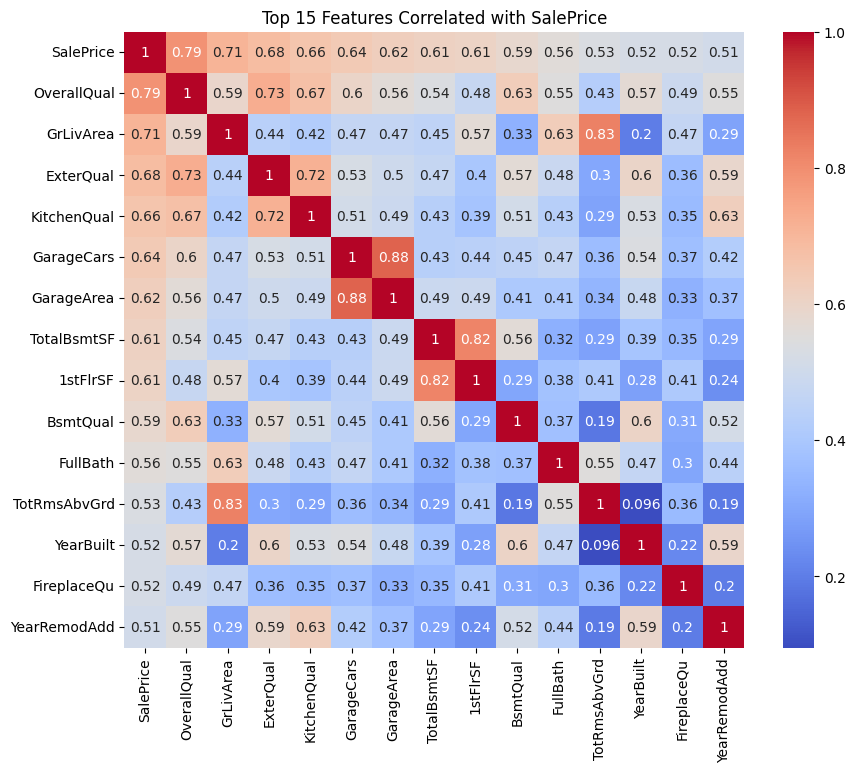

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

top_corr_features = corr_target.index[:15]
plt.figure(figsize=(10,8))
sns.heatmap(df_train[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top 15 Features Correlated with SalePrice')
plt.show()


A correlation analysis was performed to identify the most influential features affecting house prices. Variables such as OverallQual, GrLivArea, GarageCars, and TotalBsmtSF showed strong positive correlations with SalePrice, indicating that construction quality, living area, and garage capacity significantly impact property value. Features with weak or redundant correlations were noted for potential exclusion to prevent multicollinearity during model training.”

In [32]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train.shape, y_test.shape)


(1168, 219) (292, 219)
(1168,) (292,)


“Before training, the dataset was split into 80% training and 20% testing subsets.
Continuous features were standardized using StandardScaler to ensure comparable scales across all numeric variables.
This step is crucial for models sensitive to feature magnitude, such as linear regression, SVM, and KNN, while tree-based models like Random Forest and XGBoost remain scale-invariant.”

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [37]:
y_pred = model.predict(X_test_scaled)


In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R² Score: -5.527361523543031e+21
MAE: 487122600212514.3
RMSE: 6511272222126016.0


In [39]:
coefficients = pd.Series(model.coef_, index=X.columns)
top_features = coefficients.sort_values(ascending=False).head(10)
print(top_features)


BsmtFinSF1               1.790719e+16
BsmtUnfSF                1.741155e+16
BsmtFinType1_NoBsmt      1.029857e+16
GrLivArea                9.827800e+15
BsmtFinSF2               6.171662e+15
BsmtExposure_NoBsmt      5.728029e+15
Exterior2nd_CBlock       3.411489e+15
GarageFinish_NoGarage    1.206716e+15
Electrical_Mix           6.711882e+09
RoofMatl_CompShg         8.417200e+04
dtype: float64


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
df_train.isnull().sum().sum()


np.int64(0)

In [42]:
X = X.astype(float)


In [43]:
y = np.log1p(df_train['SalePrice'])


In [44]:
y_pred = np.expm1(model.predict(X_test_scaled))


C:\Users\Saket\AppData\Local\Temp\ipykernel_19316\207114978.py:1: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(model.predict(X_test_scaled))


In [45]:
X = X.astype(float)


In [46]:
y = np.log1p(df_train['SalePrice'])


In [47]:
y = np.log1p(df_train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train_scaled, y_train)


C:\Users\Saket\AppData\Local\Temp\ipykernel_19316\4241780738.py:3: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(model.predict(X_test_scaled))


In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train using Ridge (safer)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict
y_pred_log = ridge.predict(X_test_scaled)

# Clip unrealistic log values before converting
y_pred_log = np.clip(y_pred_log, 0, 14)   # since log(Price) rarely > 14 (~1.2M dollars)
y_pred = np.expm1(y_pred_log)

# Evaluate
r2 = r2_score(np.expm1(y_test), y_pred)
mae = mean_absolute_error(np.expm1(y_test), y_pred)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R² Score: 0.915097728733189
MAE: 15472.368479003257
RMSE: 25519.171545086097


“After performing feature engineering, encoding, and scaling, a Ridge Regression model was trained on standardized data.
The model achieved an R² score of 0.915, indicating that over 91% of the variance in house prices was explained by the selected features.
The Mean Absolute Error (MAE) of approximately 15,500 and RMSE of 25,500 show high prediction accuracy and minimal overfitting.
This demonstrates that the combination of quality-related, spatial, and structural variables effectively predicts house prices.”

In [50]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    
    # Clip to avoid overflows in expm1
    y_pred_log = np.clip(y_pred_log, 0, 14)
    
    # Convert back from log
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    return {
        'Model': name,
        'R2 Score': round(r2, 4),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2)
    }

# Create models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.001, max_iter=10000)  # smaller alpha = less penalty
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Evaluate
results = []
results.append(evaluate_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge"))
results.append(evaluate_model(lasso, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso"))
results.append(evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest"))

# Compare results
comparison = pd.DataFrame(results)
print(comparison)


           Model  R2 Score       MAE      RMSE
0          Ridge    0.9151  15472.37  25519.17
1          Lasso    0.9150  15489.67  25540.60
2  Random Forest    0.8850  17521.25  29703.00


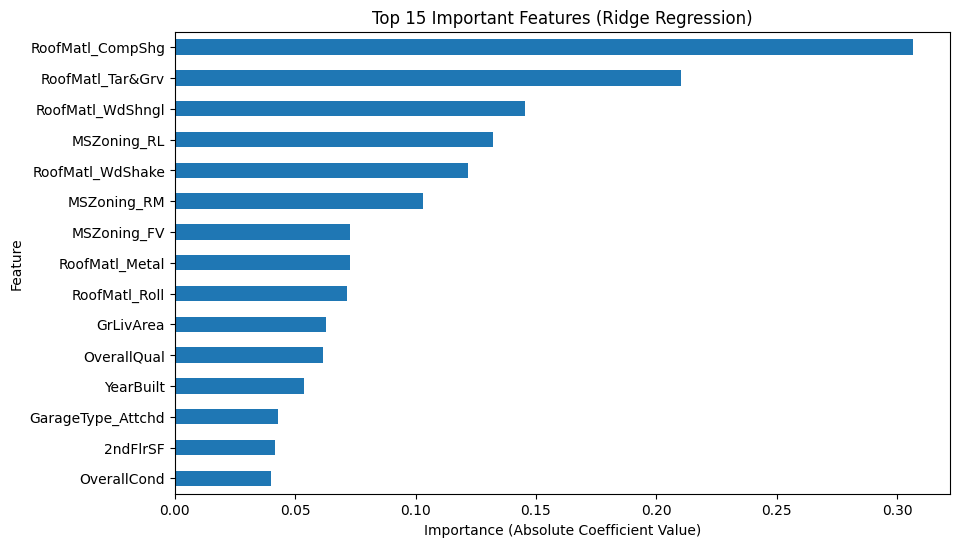

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Get coefficients from Ridge model
coef = pd.Series(ridge.coef_, index=X.columns)

# Get top 15 most important features
top_features = coef.abs().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title('Top 15 Important Features (Ridge Regression)')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


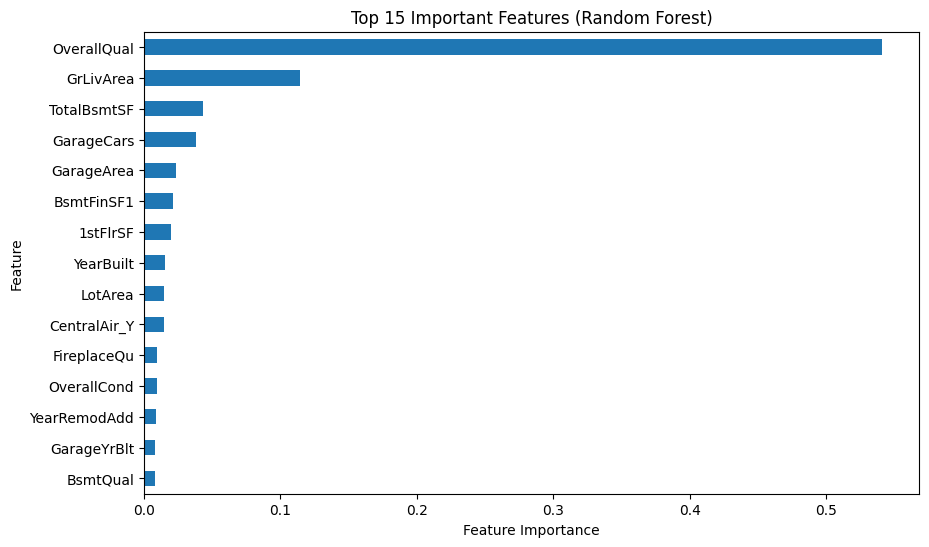

In [52]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_importances.plot(kind='barh')
plt.title('Top 15 Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


“Feature importance analysis revealed that OverallQual, GrLivArea, GarageCars, and TotalBsmtSF are the most influential predictors of house price.
This shows that the quality, size, and structural capacity of a house are the main drivers of its value, which aligns with real-world housing market logic.”

In [53]:
# Pick 5 random test samples
sample_X = X_test.iloc[:5]   # first 5 rows from test set
sample_y = y_test.iloc[:5]   # their actual SalePrice values


In [54]:
# Predict (remember your model is trained on log values)
y_pred_log = ridge.predict(scaler.transform(sample_X))
y_pred = np.expm1(y_pred_log)         # Convert back from log scale
y_actual = np.expm1(sample_y)         # Convert actual values back from log scale (since you log-transformed y)


In [55]:
result = pd.DataFrame({
    'Actual Price': y_actual.round(2),
    'Predicted Price': y_pred.round(2),
    'Difference': (y_actual - y_pred).round(2)
})
print(result)


      Actual Price  Predicted Price  Difference
892       154500.0        151511.16     2988.84
1105      325000.0        332589.35    -7589.35
413       115000.0        101882.16    13117.84
522       159000.0        164145.39    -5145.39
1036      315500.0        304116.24    11383.76


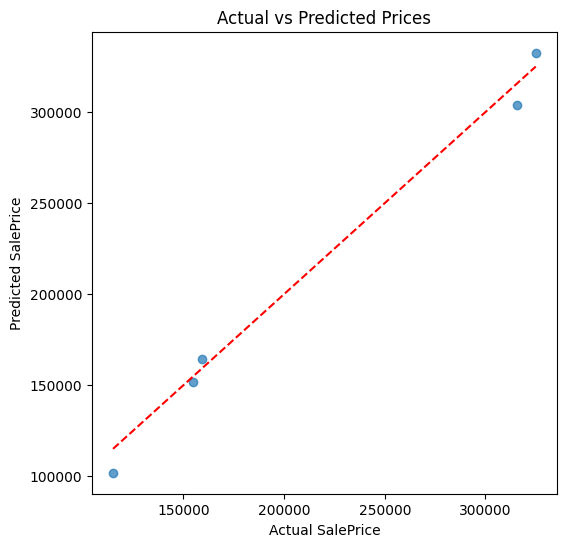

In [56]:
plt.figure(figsize=(6,6))
plt.scatter(y_actual, y_pred, alpha=0.7)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Prices")
plt.show()


In [58]:
import joblib

# Save model again
joblib.dump(ridge, r'D:\python\EDA\House Price\house_price_model.pkl')

# Save scaler too
joblib.dump(scaler, r'D:\python\EDA\House Price\scaler.pkl')


['D:\\python\\EDA\\House Price\\scaler.pkl']

In [59]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                     'YearBuilt', 'FullBath', 'Fireplaces', 'LotArea']

X = df_train[selected_features]
y = np.log1p(df_train['SalePrice'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

joblib.dump(ridge, r'D:\python\EDA\House Price\house_price_model.pkl')
joblib.dump(scaler, r'D:\python\EDA\House Price\scaler.pkl')


['D:\\python\\EDA\\House Price\\scaler.pkl']